<a href="https://colab.research.google.com/github/achinkumarror/DataScience/blob/Hackthon/HACKTHONS_May2021_NBFC_Loan_Default_Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The goal of the problem is to predict whether a client will default on the loan payment or not.
A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.
The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 
The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on the loan payment or not. 

Goal:
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.

Datasets
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform

Metric to measure
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.

Submission File Format:
You should submit a CSV file with exactly 39933 entries plus a header row.
The file should have exactly two columns

·         ID ( sorted in any order)

·         default (contains 0 & 1, 1 represents default)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [ ]:
df1 = pd.read_csv('Train_set_(1).csv')
df1.head(10)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0
5,56469197,10000,3 years,12.69,C,C2,<5 Years,OWN,56000.0,Not Verified,...,0.0,1.0,6643,48.0,590.50,INDIVIDUAL,26.0,24054.0,25167.0,0
6,3409695,15000,3 years,11.14,B,B2,10+ years,RENT,100000.0,Not Verified,...,0.0,1.0,14088,14.0,1020.57,INDIVIDUAL,35.0,14519.0,15200.0,1
7,26276447,10000,3 years,6.49,A,A2,10+ years,MORTGAGE,109000.0,Not Verified,...,1.0,0.0,12337,26.0,728.68,INDIVIDUAL,74.0,210751.0,18600.0,0
8,48393405,12000,3 years,10.99,B,B4,<5 Years,RENT,45000.0,Verified,...,0.0,0.0,10550,12.0,879.15,INDIVIDUAL,39.0,10550.0,22000.0,0
9,15140624,7000,3 years,12.49,B,B4,<5 Years,MORTGAGE,53000.0,Not Verified,...,0.0,0.0,12108,20.0,1186.80,INDIVIDUAL,96.0,145801.0,16800.0,0


In [ ]:
#datainfo

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [ ]:
#datatypes

df1.dtypes

ID                              int64
loan_amnt                       int64
loan_term                      object
interest_rate                 float64
loan_grade                     object
loan_subgrade                  object
job_experience                 object
home_ownership                 object
annual_income                 float64
income_verification_status     object
loan_purpose                   object
state_code                     object
debt_to_income                float64
delinq_2yrs                   float64
public_records                float64
revolving_balance               int64
total_acc                     float64
interest_receive              float64
application_type               object
last_week_pay                 float64
total_current_balance         float64
total_revolving_limit         float64
default                         int64
dtype: object

In [ ]:
# number of rows and column

df1.shape

(93174, 23)

In [ ]:
# Bad data like ‘$’ or ‘#’ in numerical column or any other unwanted character
# Value counts of object variable

print(df1['loan_term'].value_counts(sort=False))
print(df1['loan_grade'].value_counts(sort=False))
print(df1['loan_subgrade'].value_counts(sort=False))
print(df1['job_experience'].value_counts(sort=False))
print(df1['home_ownership'].value_counts(sort=False))
print(df1['income_verification_status'].value_counts(sort=False))
print(df1['loan_purpose'].value_counts(sort=False))
print(df1['state_code'].value_counts(sort=False))
print(df1['application_type'].value_counts(sort=False))


5 years    27963
3 years    65211
Name: loan_term, dtype: int64
A    15534
G      551
D    14715
C    25787
F     2344
E     7378
B    26865
Name: loan_grade, dtype: int64
D2    3239
A5    4723
A4    3631
G1     174
B5    5095
F5     234
G3     105
C3    5270
F3     465
B4    5879
F1     745
E4    1228
C2    5479
E2    1736
G4      60
A2    2353
C5    4413
E5     977
G2     146
B1    4843
E1    1924
D1    3716
A1    2377
B3    5879
D5    2284
D4    2717
F2     545
C4    5182
B2    5169
A3    2450
E3    1513
C1    5443
F4     355
D3    2759
G5      66
Name: loan_subgrade, dtype: int64
<5 Years      40610
6-10 years    17500
10+ years     30362
Name: job_experience, dtype: int64
OTHER          18
MORTGAGE    46445
RENT        37449
OWN          9254
NONE            8
Name: home_ownership, dtype: int64
Verified           30450
Not Verified       28237
Source Verified    34487
Name: income_verification_status, dtype: int64
home_improvement       5391
debt_consolidation    55241
credit_card

In [ ]:
df1.count()
df1.count(axis='columns')

0        23
1        23
2        23
3        22
4        23
         ..
93169    23
93170    20
93171    23
93172    23
93173    23
Length: 93174, dtype: int64

In [ ]:
# check for null values
# Are there any missing values ?

df1.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [ ]:
# Imput missing value
for column in df1.columns:
    if df1[column].dtype != 'object':
        mean = df1[column].mean()
        df1[column] = df1[column].fillna(mean)    
        
df1.isnull().sum()   

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      0
public_records                   0
revolving_balance                0
total_acc                        0
interest_receive                 0
application_type                 0
last_week_pay                    0
total_current_balance            0
total_revolving_limit            0
default                          0
dtype: int64

In [ ]:
# Imputing Nan for "object" type data column - job_experience
# Imput missing value

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df1[['job_experience']]) 

SimpleImputer(strategy='most_frequent')

In [ ]:
df1['job_experience']=imp.transform(df1[['job_experience']])
df1.isnull().sum() 

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [ ]:
# check for duplicates

df1.duplicated().sum()

0

In [ ]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,3.710751e+07,5.859895e+07,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_income,93174.0,7.502826e+04,6.945441e+04,1200.00,45000.00,6.400000e+04,9.000000e+04,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,1.764000e+01,2.389000e+01,672.52
delinq_2yrs,93174.0,3.169944e-01,8.808497e-01,0.00,0.00,0.000000e+00,0.000000e+00,22.00
public_records,93174.0,1.961212e-01,5.811820e-01,0.00,0.00,0.000000e+00,0.000000e+00,49.00
revolving_balance,93174.0,1.685447e+04,2.368907e+04,0.00,6433.00,1.185600e+04,2.074500e+04,2560703.00
total_acc,93174.0,2.524891e+01,1.185493e+01,1.00,17.00,2.400000e+01,3.200000e+01,119.00
interest_receive,93174.0,1.747264e+03,2.088236e+03,0.00,439.88,1.070755e+03,2.219613e+03,23172.31


In [ ]:
# Check for Outliers

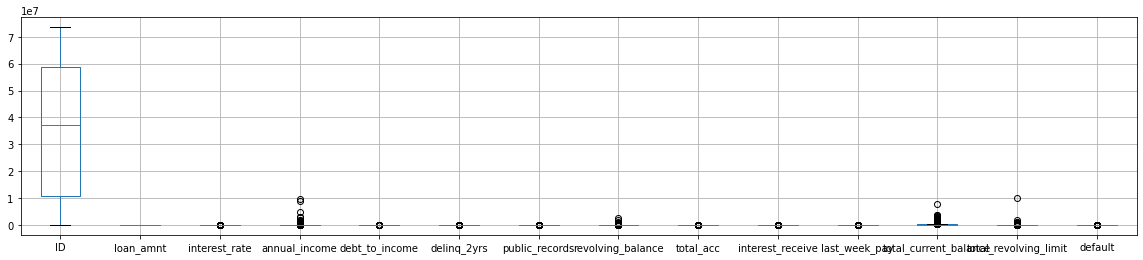

In [ ]:
#box plot to check outliers

plt.subplots(figsize=(20,4))
df1.boxplot(figsize=(20,4))

In [ ]:
# UniVariate Analysis before treating Outliers
# Univariate except names column

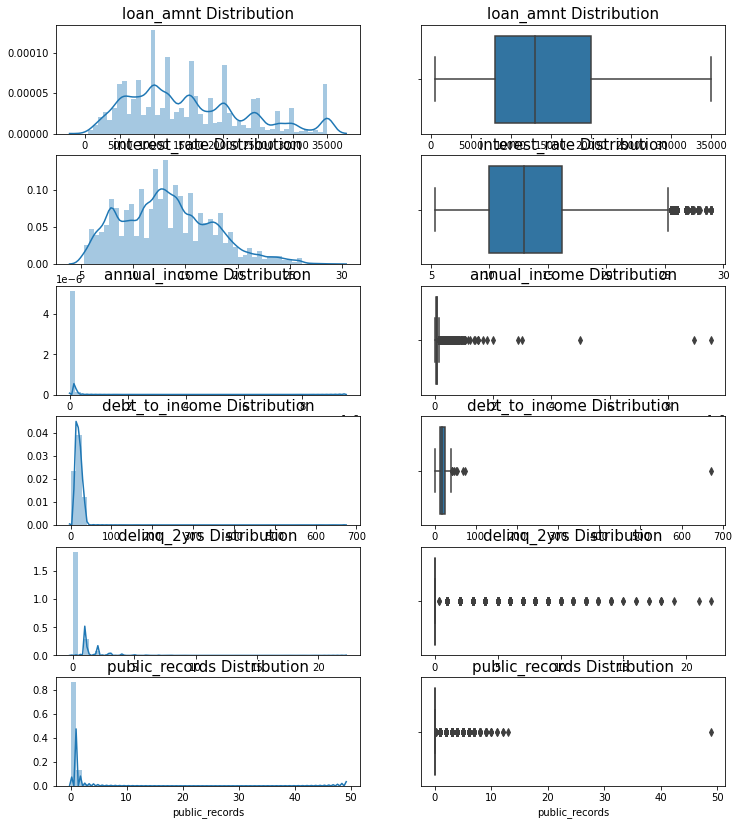

In [ ]:
# UniVariate Analysis before treating Outliers
# Univariate except names column

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df1['loan_amnt'] , ax=axes[0][0])
a.set_title("loan_amnt Distribution",fontsize=15)
a = sns.boxplot(df1['loan_amnt'] , orient = "h" , ax=axes[0][1])
a.set_title("loan_amnt Distribution",fontsize=15)


a = sns.distplot(df1['interest_rate'] , ax=axes[1][0])
a.set_title("interest_rate Distribution",fontsize=15)
a = sns.boxplot(df1['interest_rate'] , orient = "h" , ax=axes[1][1])
a.set_title("interest_rate Distribution",fontsize=15)


a = sns.distplot(df1['annual_income'] , ax=axes[2][0])
a.set_title("annual_income Distribution",fontsize=15)
a = sns.boxplot(df1['annual_income'] , orient = "h" , ax=axes[2][1])
a.set_title("annual_income Distribution",fontsize=15)


a = sns.distplot(df1['debt_to_income'] , ax=axes[3][0])
a.set_title("debt_to_income Distribution",fontsize=15)
a = sns.boxplot(df1['debt_to_income'] , orient = "h" , ax=axes[3][1])
a.set_title("debt_to_income Distribution",fontsize=15)


a = sns.distplot(df1['delinq_2yrs'] , ax=axes[4][0])
a.set_title("delinq_2yrs Distribution",fontsize=15)
a = sns.boxplot(df1['delinq_2yrs'] , orient = "h" , ax=axes[4][1])
a.set_title("delinq_2yrs Distribution",fontsize=15)


a = sns.distplot(df1['public_records'] , ax=axes[5][0])
a.set_title("public_records Distribution",fontsize=15)
a = sns.boxplot(df1['public_records'] , orient = "h" , ax=axes[5][1])
a.set_title("public_records Distribution",fontsize=15)


plt.show()

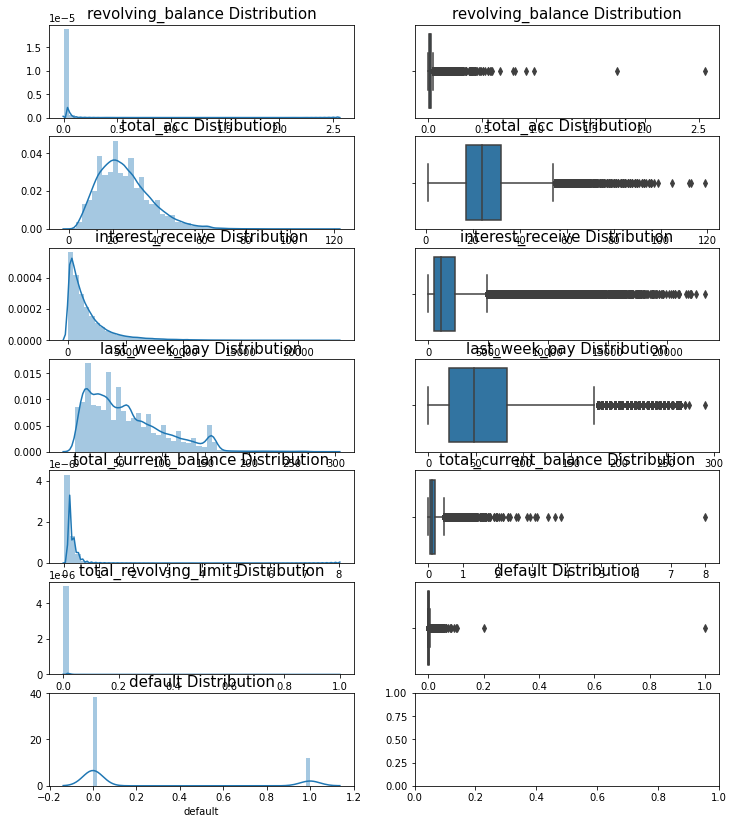

In [ ]:
# UniVariate Analysis before treating Outliers
# Univariate except names column

fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df1['revolving_balance'] , ax=axes[0][0])
a.set_title("revolving_balance Distribution",fontsize=15)
a = sns.boxplot(df1['revolving_balance'] , orient = "h" , ax=axes[0][1])
a.set_title("revolving_balance Distribution",fontsize=15)


a = sns.distplot(df1['total_acc'] , ax=axes[1][0])
a.set_title("total_acc Distribution",fontsize=15)
a = sns.boxplot(df1['total_acc'] , orient = "h" , ax=axes[1][1])
a.set_title("total_acc Distribution",fontsize=15)


a = sns.distplot(df1['interest_receive'] , ax=axes[2][0])
a.set_title("interest_receive Distribution",fontsize=15)
a = sns.boxplot(df1['interest_receive'] , orient = "h" , ax=axes[2][1])
a.set_title("interest_receive Distribution",fontsize=15)


a = sns.distplot(df1['last_week_pay'] , ax=axes[3][0])
a.set_title("last_week_pay Distribution",fontsize=15)
a = sns.boxplot(df1['last_week_pay'] , orient = "h" , ax=axes[3][1])
a.set_title("last_week_pay Distribution",fontsize=15)


a = sns.distplot(df1['total_current_balance'] , ax=axes[4][0])
a.set_title("total_current_balance Distribution",fontsize=15)
a = sns.boxplot(df1['total_current_balance'] , orient = "h" , ax=axes[4][1])
a.set_title("total_current_balance Distribution",fontsize=15)


a = sns.distplot(df1['total_revolving_limit'] , ax=axes[5][0])
a.set_title("total_revolving_limit Distribution",fontsize=15)
a = sns.boxplot(df1['total_revolving_limit'] , orient = "h" , ax=axes[5][1])
a.set_title("total_revolving_limit Distribution",fontsize=15)

a = sns.distplot(df1['default'] , ax=axes[6][0])
a.set_title("default Distribution",fontsize=15)
a = sns.boxplot(df1['default'] , orient = "h" , ax=axes[5][1])
a.set_title("default Distribution",fontsize=15)

plt.show()

In [ ]:
#Skew

df1.skew()

ID                         0.017670
loan_amnt                  0.686590
interest_rate              0.426024
annual_income             56.671147
debt_to_income             5.005686
delinq_2yrs                5.659111
public_records            10.940404
revolving_balance         24.717052
total_acc                  0.892771
interest_receive           2.835085
last_week_pay              1.022865
total_current_balance      4.549702
total_revolving_limit    118.212652
default                    1.233702
dtype: float64

In [ ]:
# Multi- Variate Analysis
# Check for correlation of variable
# pearson correlation - linear relation between numeric variables only 

df1.corr(method='pearson')

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default
ID,1.000000,0.070550,-0.140946,0.029651,0.130825,0.048395,0.085459,0.029953,0.027138,-0.462155,-0.782800,0.003717,0.029545,-0.493881
loan_amnt,0.070550,1.000000,0.146269,0.312600,0.036418,0.000051,-0.083575,0.313683,0.221027,0.530076,-0.050366,0.308804,0.240932,-0.093673
interest_rate,-0.140946,0.146269,1.000000,-0.064548,0.163057,0.055203,0.048747,-0.032946,-0.029836,0.446891,0.074183,-0.086098,-0.129055,-0.000201
annual_income,0.029651,0.312600,-0.064548,1.000000,-0.165572,0.047677,-0.009154,0.291281,0.175375,0.122774,-0.025010,0.407298,0.228075,-0.003014
debt_to_income,0.130825,0.036418,0.163057,-0.165572,1.000000,-0.015269,-0.044236,0.122731,0.214984,0.014969,-0.099769,-0.017865,0.047069,-0.132776
delinq_2yrs,0.048395,0.000051,0.055203,0.047677,-0.015269,1.000000,-0.009842,-0.028839,0.128916,0.002880,-0.043750,0.067947,-0.031133,-0.040747
public_records,0.085459,-0.083575,0.048747,-0.009154,-0.044236,-0.009842,1.000000,-0.096294,0.015716,-0.066196,-0.080061,-0.072014,-0.080367,-0.050407
revolving_balance,0.029953,0.313683,-0.032946,0.291281,0.122731,-0.028839,-0.096294,1.000000,0.180104,0.130156,-0.015430,0.441148,0.785215,-0.034000
total_acc,0.027138,0.221027,-0.029836,0.175375,0.214984,0.128916,0.015716,0.180104,1.000000,0.097986,-0.043644,0.296194,0.193711,0.000561
interest_receive,-0.462155,0.530076,0.446891,0.122774,0.014969,0.002880,-0.066196,0.130156,0.097986,1.000000,0.522943,0.116504,0.053091,0.041364


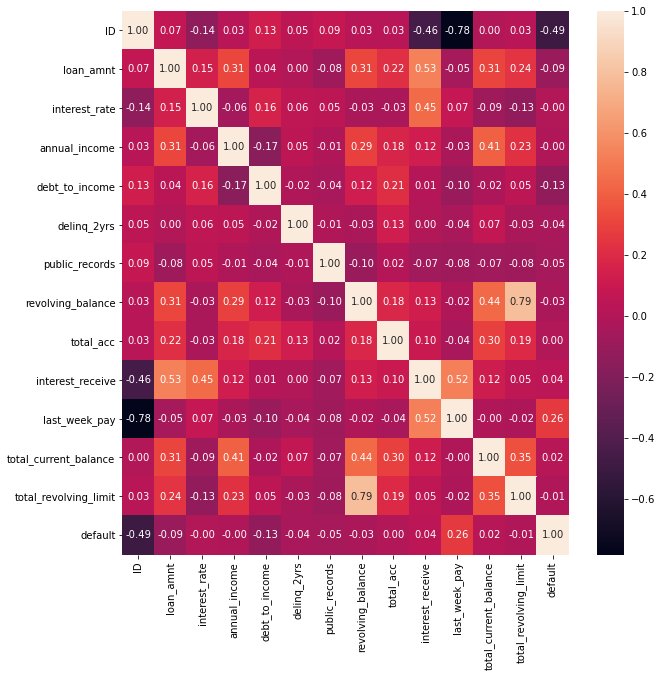

In [ ]:
#heatmap

plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')  # plot the correlation coefficients as a heatmap

In [ ]:
# Highest correlation is between: 
# 2nd Highest correlation is between: 
# This heaptmap/table clearly shows the presence of multi collinearity in the dataset. which impacts the model
# Lowest correlation is between:table and depth =-0.30

In [ ]:
# Data Distribution
# Pair Plot for continious variables
# sns.pairplot(df1)
# plt.show()

In [ ]:
# Univariate Graphs (Single Variable graphs)

In [ ]:
# Do you think scaling is necessary?

In [ ]:
df1.describe()

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default
count,9.317400e+04,93174.000000,93174.000000,9.317400e+04,93174.000000,93174.000000,93174.000000,9.317400e+04,93174.000000,93174.000000,93174.000000,9.317400e+04,9.317400e+04,93174.000000
mean,3.505021e+07,14733.861378,13.233433,7.502826e+04,18.127623,0.316994,0.196121,1.685447e+04,25.248905,1747.263530,58.154882,1.392529e+05,3.208590e+04,0.237502
std,2.414926e+07,8428.184858,4.368728,6.945441e+04,8.563084,0.880850,0.581182,2.368907e+04,11.854934,2088.236141,43.866507,1.513077e+05,4.514904e+04,0.425555
min,7.073500e+04,500.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.085983e+07,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,6.433000e+03,17.000000,439.880000,22.000000,3.195300e+04,1.470000e+04,0.000000
50%,3.710751e+07,13000.000000,12.990000,6.400000e+04,17.640000,0.000000,0.000000,1.185600e+04,24.000000,1070.755000,48.000000,9.843500e+04,2.570000e+04,0.000000
75%,5.859895e+07,20000.000000,16.200000,9.000000e+04,23.890000,0.000000,0.000000,2.074500e+04,32.000000,2219.612500,83.000000,1.949948e+05,3.787500e+04,0.000000
max,7.351975e+07,35000.000000,28.990000,9.500000e+06,672.520000,22.000000,49.000000,2.560703e+06,119.000000,23172.310000,291.000000,8.000078e+06,9.999999e+06,1.000000


In [ ]:
# yes scaling is required as some data is in signle, double and four digits
# The independent attributes have different units and scales of measurement
# It is always a good practise to scale all the dimesions using Z-score or someother method to address the problem of different units

In [ ]:
# Encode the data (having string values) for Modelling
# unique values for categorical variables (datatype=object)
# Creating all OBJECT datatype to int as LR and LDA does not accept object data type.

In [ ]:
# unique values for categorical variables (datatype=object)

for i in df1.columns:
    if df1[i].dtype == 'object':
        print('\n')
        print('feature:',i)
        print(pd.Categorical(df1[i].unique()))
        print(pd.Categorical(df1[i].unique()).codes)
        df1[i] = pd.Categorical(df1[i]).codes  



feature: loan_term
[3 years, 5 years]
Categories (2, object): [3 years, 5 years]
[0 1]


feature: loan_grade
[B, C, A, E, D, F, G]
Categories (7, object): [A, B, C, D, E, F, G]
[1 2 0 4 3 5 6]


feature: loan_subgrade
[B2, C1, A4, C4, A2, ..., F1, G1, G5, G2, G4]
Length: 35
Categories (35, object): [A1, A2, A3, A4, ..., G2, G3, G4, G5]
[ 6 10  3 13  1 11  8  4 21  9  2 14 24  5 19 18 22  7 12 17  0 29 20 23
 27 15 32 26 16 28 25 30 34 31 33]


feature: job_experience
[<5 Years, 10+ years, 6-10 years]
Categories (3, object): [10+ years, 6-10 years, <5 Years]
[2 0 1]


feature: home_ownership
[OWN, MORTGAGE, RENT, NONE, OTHER]
Categories (5, object): [MORTGAGE, NONE, OTHER, OWN, RENT]
[3 0 4 1 2]


feature: income_verification_status
[Not Verified, Verified, Source Verified]
Categories (3, object): [Not Verified, Source Verified, Verified]
[0 2 1]


feature: loan_purpose
[debt_consolidation, credit_card, other, home_improvement]
Categories (4, object): [credit_card, debt_consolidation,

In [ ]:
df1.head(10)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,0,9.17,1,6,2,3,85000.0,0,...,0.0,0.0,39519,20.0,59.60,0,4.0,95493.0,84100.0,0
1,14257956,18000,0,13.65,2,10,2,3,64000.0,2,...,0.0,1.0,9783,24.0,3348.25,0,95.0,185433.0,13500.0,0
2,66216451,16000,0,7.26,0,3,2,0,150000.0,1,...,2.0,0.0,13641,27.0,276.69,0,13.0,180519.0,19300.0,0
3,46974169,25000,0,13.99,2,13,2,0,59800.0,2,...,0.0,0.0,35020,35.0,1106.72,0,17.0,183208.0,55400.0,0
4,46725961,17000,0,6.39,0,1,0,0,72000.0,1,...,0.0,0.0,23990,26.0,725.29,0,39.0,23990.0,81300.0,0
5,56469197,10000,0,12.69,2,11,2,3,56000.0,0,...,0.0,1.0,6643,48.0,590.50,0,26.0,24054.0,25167.0,0
6,3409695,15000,0,11.14,1,6,0,4,100000.0,0,...,0.0,1.0,14088,14.0,1020.57,0,35.0,14519.0,15200.0,1
7,26276447,10000,0,6.49,0,1,0,0,109000.0,0,...,1.0,0.0,12337,26.0,728.68,0,74.0,210751.0,18600.0,0
8,48393405,12000,0,10.99,1,8,2,4,45000.0,2,...,0.0,0.0,10550,12.0,879.15,0,39.0,10550.0,22000.0,0
9,15140624,7000,0,12.49,1,8,2,0,53000.0,0,...,0.0,0.0,12108,20.0,1186.80,0,96.0,145801.0,16800.0,0


In [ ]:
# Converting categorical to dummy variables

df1 = pd.get_dummies(df1, columns=['loan_term','loan_grade','loan_subgrade','job_experience', 'home_ownership','income_verification_status','loan_purpose','state_code','application_type'],drop_first=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Columns: 116 entries, ID to application_type_1
dtypes: float64(10), int64(4), uint8(102)
memory usage: 19.0 MB


In [ ]:
#summary

df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,37107507.00,58598949.50,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,13000.00,20000.00,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,12.99,16.20,28.99
annual_income,93174.0,7.502826e+04,6.945441e+04,1200.00,45000.00,64000.00,90000.00,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,17.64,23.89,672.52
...,...,...,...,...,...,...,...,...
state_code_46,93174.0,2.187305e-02,1.462698e-01,0.00,0.00,0.00,0.00,1.00
state_code_47,93174.0,1.294353e-02,1.130315e-01,0.00,0.00,0.00,0.00,1.00
state_code_48,93174.0,4.937000e-03,7.009050e-02,0.00,0.00,0.00,0.00,1.00
state_code_49,93174.0,2.275313e-03,4.764620e-02,0.00,0.00,0.00,0.00,1.00


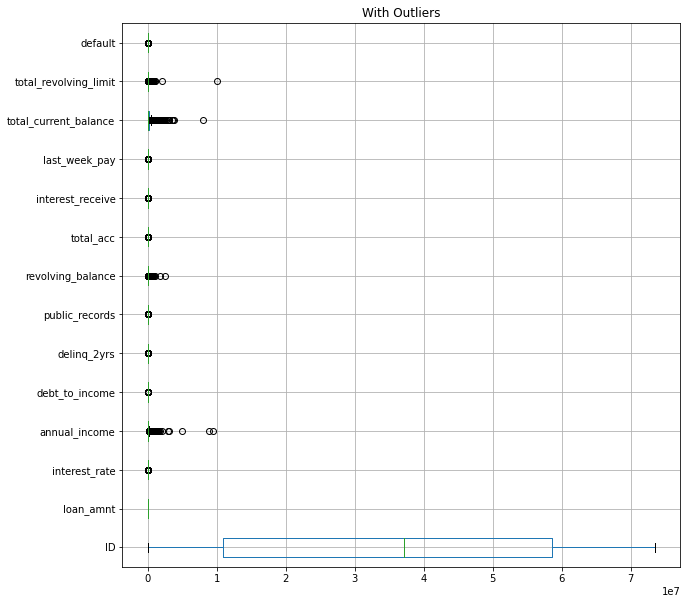

In [ ]:
# construct box plot for continuous variables

cont = df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='bool')].index

plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=12)
plt.show()

In [ ]:
#Outlier treatment :  
#define a custom function- If for a particular column the max value is greater than that assign max value,same logic for min value
#These outliers value needs to be teated and there are several ways of treating them:
#1. Drop the outlier value
#2. Replace the outlier value using the IQR

In [ ]:
#Outlier Treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
#Outlier Treatment

#for column in df1[cont].columns:
#    lr,ur=remove_outlier(df1[column])
#    df1[column]=np.where(df1[column]>ur,ur,df1[column])
#    df1[column]=np.where(df1[column]<lr,lr,df1[column])

In [ ]:
lrApps,urApps=remove_outlier(df1['interest_rate'])
df1['interest_rate']=np.where(df1['interest_rate']>urApps,urApps,df1['interest_rate'])
df1['interest_rate']=np.where(df1['interest_rate']<lrApps,lrApps,df1['interest_rate'])

lrApps,urApps=remove_outlier(df1['annual_income'])
df1['annual_income']=np.where(df1['annual_income']>urApps,urApps,df1['annual_income'])
df1['annual_income']=np.where(df1['annual_income']<lrApps,lrApps,df1['annual_income'])

lrApps,urApps=remove_outlier(df1['debt_to_income'])
df1['debt_to_income']=np.where(df1['debt_to_income']>urApps,urApps,df1['debt_to_income'])
df1['debt_to_income']=np.where(df1['debt_to_income']<lrApps,lrApps,df1['debt_to_income'])

lrApps,urApps=remove_outlier(df1['delinq_2yrs'])
df1['delinq_2yrs']=np.where(df1['delinq_2yrs']>urApps,urApps,df1['delinq_2yrs'])
df1['delinq_2yrs']=np.where(df1['delinq_2yrs']<lrApps,lrApps,df1['delinq_2yrs'])

lrApps,urApps=remove_outlier(df1['public_records'])
df1['public_records']=np.where(df1['public_records']>urApps,urApps,df1['public_records'])
df1['public_records']=np.where(df1['public_records']<lrApps,lrApps,df1['public_records'])

lrApps,urApps=remove_outlier(df1['revolving_balance'])
df1['revolving_balance']=np.where(df1['revolving_balance']>urApps,urApps,df1['revolving_balance'])
df1['revolving_balance']=np.where(df1['revolving_balance']<lrApps,lrApps,df1['revolving_balance'])

lrApps,urApps=remove_outlier(df1['total_acc'])
df1['total_acc']=np.where(df1['total_acc']>urApps,urApps,df1['total_acc'])
df1['total_acc']=np.where(df1['total_acc']<lrApps,lrApps,df1['total_acc'])

lrApps,urApps=remove_outlier(df1['interest_receive'])
df1['interest_receive']=np.where(df1['interest_receive']>urApps,urApps,df1['interest_receive'])
df1['interest_receive']=np.where(df1['interest_receive']<lrApps,lrApps,df1['interest_receive'])

lrApps,urApps=remove_outlier(df1['last_week_pay'])
df1['last_week_pay']=np.where(df1['last_week_pay']>urApps,urApps,df1['last_week_pay'])
df1['last_week_pay']=np.where(df1['last_week_pay']<lrApps,lrApps,df1['last_week_pay'])

lrApps,urApps=remove_outlier(df1['total_current_balance'])
df1['total_current_balance']=np.where(df1['total_current_balance']>urApps,urApps,df1['total_current_balance'])
df1['total_current_balance']=np.where(df1['total_current_balance']<lrApps,lrApps,df1['total_current_balance'])

lrApps,urApps=remove_outlier(df1['total_revolving_limit'])
df1['total_revolving_limit']=np.where(df1['total_revolving_limit']>urApps,urApps,df1['total_revolving_limit'])
df1['total_revolving_limit']=np.where(df1['total_revolving_limit']<lrApps,lrApps,df1['total_revolving_limit'])



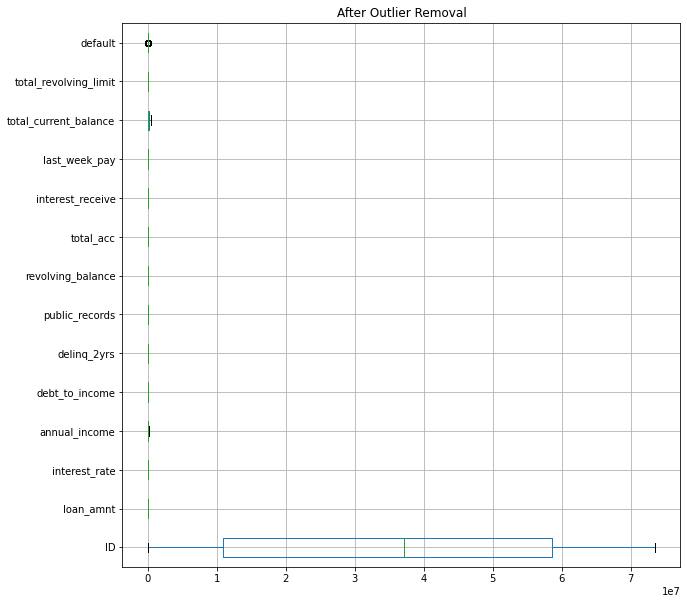

In [ ]:
plt.figure(figsize=(10,10))
df1[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=12)
plt.show()

In [ ]:
# Proportion of 1s and 0s
# Proportion of observations in Target - default

df1['default'].value_counts()

0    71045
1    22129
Name: default, dtype: int64

In [ ]:
import statsmodels.api as sm  #stats summary
import sklearn  #machinelearning
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [ ]:
# Copy all the predictor variables into X dataframe
X = df1.drop('default', axis=1)

# Copy target into the y dataframe. 
y = df1['default']

In [ ]:
X = scale(X)

In [ ]:
# Checking dimensions on the train and test data

print('X: ',X.shape)
print('y: ',y.shape)


X:  (93174, 115)
y:  (93174,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [ ]:
# Checking dimensions on the train and test data

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (69880, 115)
X_test:  (23294, 115)
y_train:  (69880,)
y_test:  (23294,)


In [ ]:
#model

# LDA (linear discriminant analysis)

In [ ]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)
lda_model

LinearDiscriminantAnalysis()

In [ ]:
#Predict it
lda_ytrain_predict = lda_model.predict(X_train)
lda_ytest_predict = lda_model.predict(X_test)

In [ ]:
#Performance parameter
print(confusion_matrix(y_train,lda_ytrain_predict ))

# Classification report for Train data
print (classification_report(y_train,lda_ytrain_predict))

[[49111  4125]
 [ 6918  9726]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     53236
           1       0.70      0.58      0.64     16644

    accuracy                           0.84     69880
   macro avg       0.79      0.75      0.77     69880
weighted avg       0.84      0.84      0.84     69880



In [ ]:
#Predict it
lda_ytest_predict = lda_model.predict(X_test)
lda_ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#LDA model score for traindata # Accuracy on train data

lda_model.score(X_train, y_train)

0.841971951917573

LDA_Train_AUC: 0.881


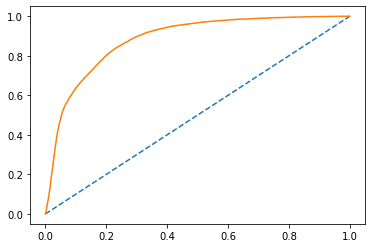

In [ ]:
# AUC and ROC for the training Data
probs = lda_model.predict_proba(X_train)
#keep probabilities for the positive outcome only
probs = probs[:,1]

#calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('LDA_Train_AUC: %.3f' %train_auc)

#calculate roc curve
train_fpr, train_tpr, train_threshold = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

#plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

In [ ]:
#LDA model score for testdata  # Accuracy on test data
lda_model.score(X_test, y_test)

0.8383703958100799

In [ ]:
#Performance parameter
print(confusion_matrix(y_test,lda_ytest_predict ))

# Classification report for test data
print (classification_report(y_test,lda_ytest_predict))

[[16393  1416]
 [ 2349  3136]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     17809
           1       0.69      0.57      0.62      5485

    accuracy                           0.84     23294
   macro avg       0.78      0.75      0.76     23294
weighted avg       0.83      0.84      0.83     23294



LDA_Test_AUC: 0.877


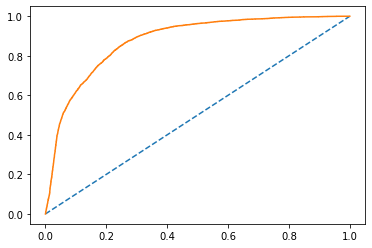

In [ ]:
# AUC and ROC for the test Data
probs = lda_model.predict_proba(X_test)
#keep probabilities for the positive outcome only
probs = probs[:,1]

#calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('LDA_Test_AUC: %.3f' %test_auc)

#calculate roc curve
test_fpr, test_tpr, test_threshold = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

#plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

In [ ]:
#LDA model score for traindata
#Accuracy - Training Data

print("Accuracy_LDA_Train:", lda_model.score(X_train, y_train))

#LR model score for testdata
#Accuracy - Test Data

print("Accuracy_LDA_Test:", lda_model.score(X_test, y_test))

Accuracy_LDA_Train: 0.841971951917573
Accuracy_LDA_Test: 0.8383703958100799


# Run this model on Test Data.csv

In [ ]:
df2 = pd.read_csv('Test_set_(1).csv')
df2.head(10)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,...,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,...,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,...,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,...,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0
5,1464149,5850,3 years,12.12,B,B3,<5 Years,MORTGAGE,72000.0,Not Verified,...,23.14,0.0,0.0,16554,20.0,1155.78,INDIVIDUAL,156.0,NaN,NaN
6,7429943,18000,5 years,20.80,E,E1,<5 Years,RENT,45000.0,Verified,...,8.17,0.0,0.0,12282,19.0,2409.02,INDIVIDUAL,35.0,12282.0,45752.0
7,10047245,8575,3 years,23.10,E,E4,<5 Years,OWN,60000.0,Source Verified,...,21.01,0.0,2.0,4870,40.0,1085.56,INDIVIDUAL,35.0,73951.0,7800.0
8,46816125,15000,5 years,13.33,C,C3,6-10 years,MORTGAGE,40000.0,Source Verified,...,25.17,0.0,0.0,12687,22.0,1415.78,INDIVIDUAL,39.0,124171.0,21100.0
9,57125517,10000,3 years,12.69,C,C2,<5 Years,MORTGAGE,30000.0,Verified,...,5.76,0.0,0.0,5012,5.0,643.37,INDIVIDUAL,26.0,5012.0,5000.0


In [ ]:
#datainfo

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          39933 non-null  int64  
 1   loan_amnt                   39933 non-null  int64  
 2   loan_term                   39933 non-null  object 
 3   interest_rate               39933 non-null  float64
 4   loan_grade                  39933 non-null  object 
 5   loan_subgrade               39933 non-null  object 
 6   job_experience              37844 non-null  object 
 7   home_ownership              39933 non-null  object 
 8   annual_income               39933 non-null  float64
 9   income_verification_status  39933 non-null  object 
 10  loan_purpose                39933 non-null  object 
 11  state_code                  39933 non-null  object 
 12  debt_to_income              39933 non-null  float64
 13  delinq_2yrs                 399

In [ ]:
#datatypes

df2.dtypes

ID                              int64
loan_amnt                       int64
loan_term                      object
interest_rate                 float64
loan_grade                     object
loan_subgrade                  object
job_experience                 object
home_ownership                 object
annual_income                 float64
income_verification_status     object
loan_purpose                   object
state_code                     object
debt_to_income                float64
delinq_2yrs                   float64
public_records                float64
revolving_balance               int64
total_acc                     float64
interest_receive              float64
application_type               object
last_week_pay                 float64
total_current_balance         float64
total_revolving_limit         float64
dtype: object

In [ ]:
# number of rows and column

df2.shape

(39933, 22)

In [ ]:
# check for null values
# Are there any missing values ?

df2.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [ ]:
# Imput missing value
for column in df2.columns:
    if df2[column].dtype != 'object':
        mean = df2[column].mean()
        df2[column] = df2[column].fillna(mean)    
        
df2.isnull().sum() 

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      0
public_records                   0
revolving_balance                0
total_acc                        0
interest_receive                 0
application_type                 0
last_week_pay                    0
total_current_balance            0
total_revolving_limit            0
dtype: int64

In [ ]:
# Imputing Nan for "object" type data column - job_experience
# Imput missing value

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df2[['job_experience']]) 


SimpleImputer(strategy='most_frequent')

In [ ]:
df2['job_experience']=imp.transform(df2[['job_experience']])
df2.isnull().sum() 

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64

In [ ]:
# check for duplicates

df2.duplicated().sum()

0

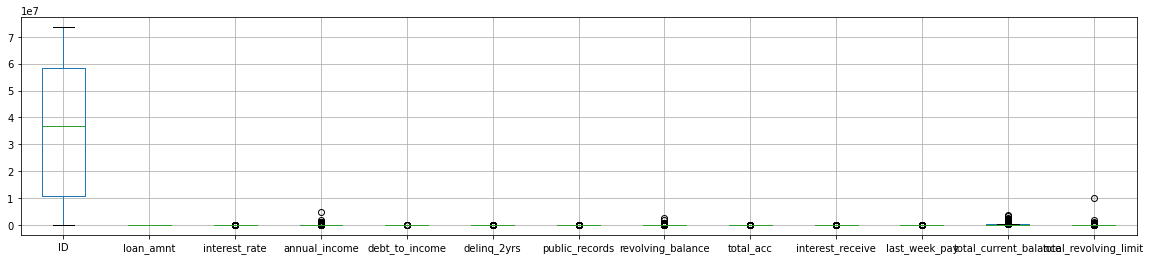

In [ ]:
#box plot to check outliers

plt.subplots(figsize=(20,4))
df2.boxplot(figsize=(20,4))

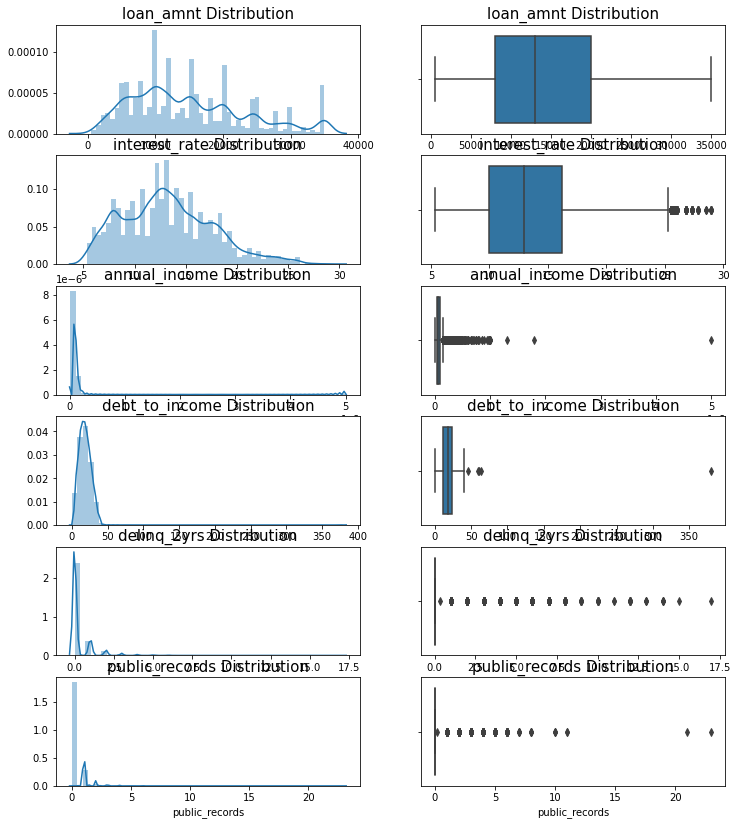

In [ ]:
# UniVariate Analysis before treating Outliers
# Univariate except names column

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df2['loan_amnt'] , ax=axes[0][0])
a.set_title("loan_amnt Distribution",fontsize=15)
a = sns.boxplot(df2['loan_amnt'] , orient = "h" , ax=axes[0][1])
a.set_title("loan_amnt Distribution",fontsize=15)


a = sns.distplot(df2['interest_rate'] , ax=axes[1][0])
a.set_title("interest_rate Distribution",fontsize=15)
a = sns.boxplot(df2['interest_rate'] , orient = "h" , ax=axes[1][1])
a.set_title("interest_rate Distribution",fontsize=15)


a = sns.distplot(df2['annual_income'] , ax=axes[2][0])
a.set_title("annual_income Distribution",fontsize=15)
a = sns.boxplot(df2['annual_income'] , orient = "h" , ax=axes[2][1])
a.set_title("annual_income Distribution",fontsize=15)


a = sns.distplot(df2['debt_to_income'] , ax=axes[3][0])
a.set_title("debt_to_income Distribution",fontsize=15)
a = sns.boxplot(df2['debt_to_income'] , orient = "h" , ax=axes[3][1])
a.set_title("debt_to_income Distribution",fontsize=15)


a = sns.distplot(df2['delinq_2yrs'] , ax=axes[4][0])
a.set_title("delinq_2yrs Distribution",fontsize=15)
a = sns.boxplot(df2['delinq_2yrs'] , orient = "h" , ax=axes[4][1])
a.set_title("delinq_2yrs Distribution",fontsize=15)


a = sns.distplot(df2['public_records'] , ax=axes[5][0])
a.set_title("public_records Distribution",fontsize=15)
a = sns.boxplot(df2['public_records'] , orient = "h" , ax=axes[5][1])
a.set_title("public_records Distribution",fontsize=15)


plt.show()

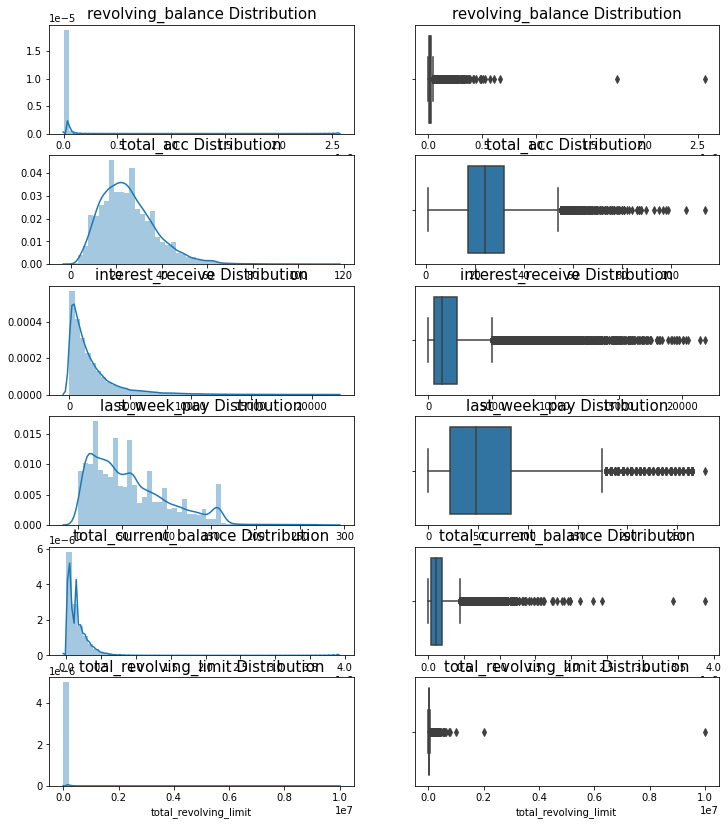

In [ ]:
# UniVariate Analysis before treating Outliers
# Univariate except names column

fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(df2['revolving_balance'] , ax=axes[0][0])
a.set_title("revolving_balance Distribution",fontsize=15)
a = sns.boxplot(df2['revolving_balance'] , orient = "h" , ax=axes[0][1])
a.set_title("revolving_balance Distribution",fontsize=15)


a = sns.distplot(df2['total_acc'] , ax=axes[1][0])
a.set_title("total_acc Distribution",fontsize=15)
a = sns.boxplot(df2['total_acc'] , orient = "h" , ax=axes[1][1])
a.set_title("total_acc Distribution",fontsize=15)


a = sns.distplot(df2['interest_receive'] , ax=axes[2][0])
a.set_title("interest_receive Distribution",fontsize=15)
a = sns.boxplot(df2['interest_receive'] , orient = "h" , ax=axes[2][1])
a.set_title("interest_receive Distribution",fontsize=15)


a = sns.distplot(df2['last_week_pay'] , ax=axes[3][0])
a.set_title("last_week_pay Distribution",fontsize=15)
a = sns.boxplot(df2['last_week_pay'] , orient = "h" , ax=axes[3][1])
a.set_title("last_week_pay Distribution",fontsize=15)


a = sns.distplot(df2['total_current_balance'] , ax=axes[4][0])
a.set_title("total_current_balance Distribution",fontsize=15)
a = sns.boxplot(df2['total_current_balance'] , orient = "h" , ax=axes[4][1])
a.set_title("total_current_balance Distribution",fontsize=15)


a = sns.distplot(df2['total_revolving_limit'] , ax=axes[5][0])
a.set_title("total_revolving_limit Distribution",fontsize=15)
a = sns.boxplot(df2['total_revolving_limit'] , orient = "h" , ax=axes[5][1])
a.set_title("total_revolving_limit Distribution",fontsize=15)


plt.show()

In [ ]:
#Skew

df2.skew()

ID                         0.030397
loan_amnt                  0.674104
interest_rate              0.439289
annual_income             20.713209
debt_to_income             2.163136
delinq_2yrs                5.164267
public_records             7.375972
revolving_balance         35.076225
total_acc                  0.864873
interest_receive           2.752037
last_week_pay              0.997807
total_current_balance      3.187230
total_revolving_limit    120.753679
dtype: float64

In [ ]:
# Multi- Variate Analysis
# Check for correlation of variable
# pearson correlation - linear relation between numeric variables only 

df2.corr(method='pearson')

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit
ID,1.000000,0.058760,-0.153652,0.047427,0.126511,0.057106,0.078368,0.031802,0.025264,-0.464443,-0.782456,0.002922,0.024225
loan_amnt,0.058760,1.000000,0.146914,0.385389,0.040019,0.009659,-0.087014,0.288362,0.225241,0.538531,-0.042884,0.318287,0.186938
interest_rate,-0.153652,0.146914,1.000000,-0.082386,0.156638,0.054410,0.047647,-0.028533,-0.041323,0.451795,0.084363,-0.091491,-0.100789
annual_income,0.047427,0.385389,-0.082386,1.000000,-0.199589,0.060254,-0.006278,0.326454,0.212984,0.145332,-0.038441,0.481591,0.241264
debt_to_income,0.126511,0.040019,0.156638,-0.199589,1.000000,-0.003181,-0.047663,0.122943,0.233546,0.019891,-0.094859,-0.010279,0.043147
delinq_2yrs,0.057106,0.009659,0.054410,0.060254,-0.003181,1.000000,-0.021179,-0.021148,0.121494,0.000936,-0.048962,0.069587,-0.023173
public_records,0.078368,-0.087014,0.047647,-0.006278,-0.047663,-0.021179,1.000000,-0.091343,0.014331,-0.062511,-0.078424,-0.079698,-0.064252
revolving_balance,0.031802,0.288362,-0.028533,0.326454,0.122943,-0.021148,-0.091343,1.000000,0.166876,0.119629,-0.014079,0.437792,0.799612
total_acc,0.025264,0.225241,-0.041323,0.212984,0.233546,0.121494,0.014331,0.166876,1.000000,0.096968,-0.048620,0.301870,0.152119
interest_receive,-0.464443,0.538531,0.451795,0.145332,0.019891,0.000936,-0.062511,0.119629,0.096968,1.000000,0.525121,0.121738,0.043355


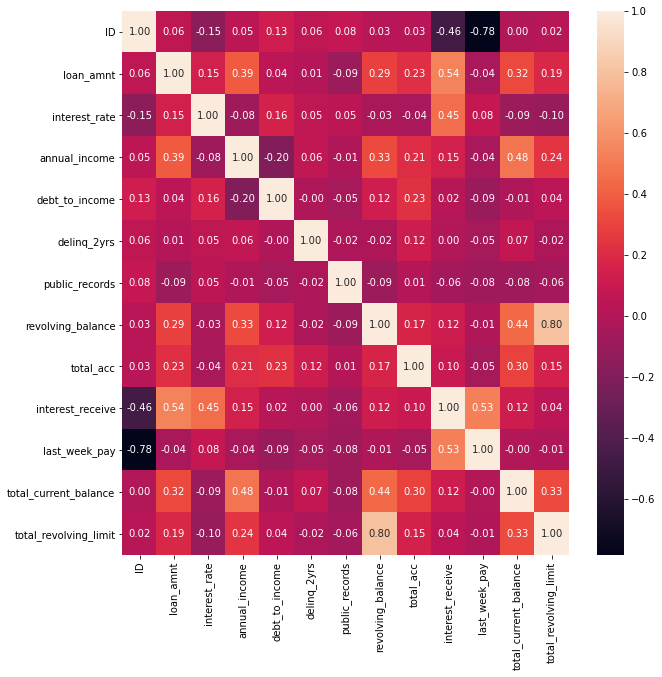

In [ ]:
#heatmap

plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(), annot=True, fmt='.2f')  # plot the correlation coefficients as a heatmap

In [ ]:
# unique values for categorical variables (datatype=object)

for i in df2.columns:
    if df2[i].dtype == 'object':
        print('\n')
        print('feature:',i)
        print(pd.Categorical(df2[i].unique()))
        print(pd.Categorical(df2[i].unique()).codes)
        df2[i] = pd.Categorical(df2[i]).codes  



feature: loan_term
[3 years, 5 years]
Categories (2, object): [3 years, 5 years]
[0 1]


feature: loan_grade
[C, A, B, E, D, G, F]
Categories (7, object): [A, B, C, D, E, F, G]
[2 0 1 4 3 6 5]


feature: loan_subgrade
[C2, A4, C1, B3, B5, ..., F5, G2, F4, G4, G5]
Length: 35
Categories (35, object): [A1, A2, A3, A4, ..., G2, G3, G4, G5]
[11  3 10  7  9 20 23 12 21 18 16  2  8  0 30  5  4 13  6  1 26 25 15 19
 17 14 27 32 22 24 29 31 28 33 34]


feature: job_experience
[<5 Years, 10+ years, 6-10 years]
Categories (3, object): [10+ years, 6-10 years, <5 Years]
[2 0 1]


feature: home_ownership
[MORTGAGE, RENT, OWN, OTHER, NONE]
Categories (5, object): [MORTGAGE, NONE, OTHER, OWN, RENT]
[0 4 3 2 1]


feature: income_verification_status
[Not Verified, Verified, Source Verified]
Categories (3, object): [Not Verified, Source Verified, Verified]
[0 2 1]


feature: loan_purpose
[debt_consolidation, credit_card, other, home_improvement]
Categories (4, object): [credit_card, debt_consolidation,

In [ ]:
# Converting categorical to dummy variables

df2 = pd.get_dummies(df2, columns=['loan_term','loan_grade','loan_subgrade','job_experience', 'home_ownership','income_verification_status','loan_purpose','state_code','application_type'],drop_first=True)

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Columns: 115 entries, ID to application_type_1
dtypes: float64(10), int64(3), uint8(102)
memory usage: 7.8 MB


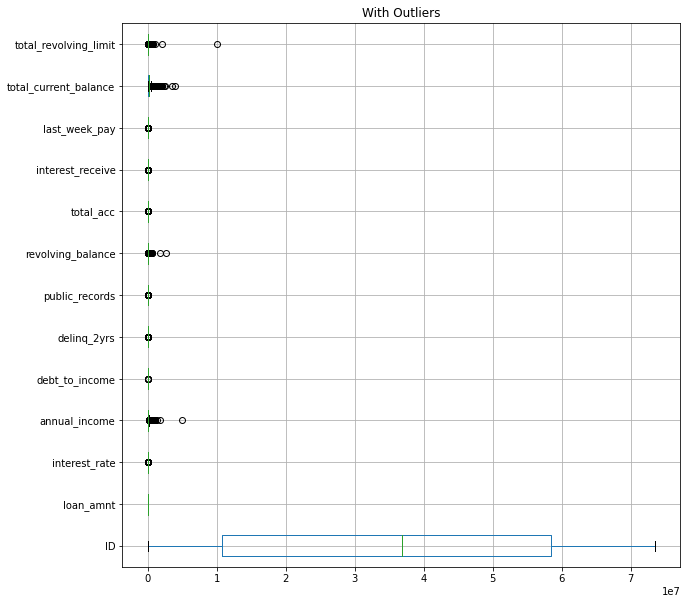

In [ ]:
# construct box plot for continuous variables

cont = df2.dtypes[(df2.dtypes!='uint8') & (df2.dtypes!='bool')].index

plt.figure(figsize=(10,10))
df2[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=12)
plt.show()

In [ ]:
#Outlier Treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
#Outlier Treatment

for column in df2[cont].columns:
    lr,ur=remove_outlier(df2[column])
    df2[column]=np.where(df2[column]>ur,ur,df2[column])
    df2[column]=np.where(df2[column]<lr,lr,df2[column])

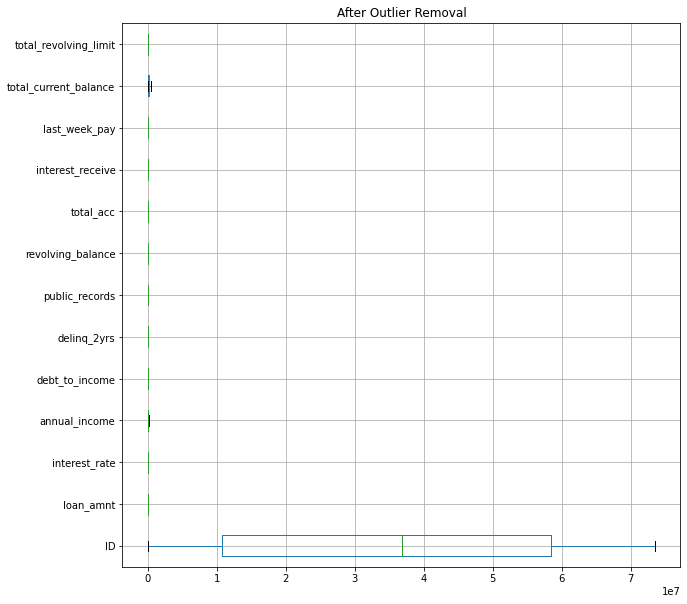

In [ ]:
plt.figure(figsize=(10,10))
df2[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=12)
plt.show()

In [ ]:
import statsmodels.api as sm  #stats summary
import sklearn  #machinelearning
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [ ]:
# Add new column to dataframe
# add an empty columns

# df2['default'] = ''
# df2['default'] = np.nan

In [ ]:
# Copy all the predictor variables into X dataframe
#Test_X = df2

# Copy target into the y dataframe. 
#Test_y = df2['ID']

In [ ]:
# Copy all the predictor variables into X dataframe
Test_X = df2

# Copy target into the y dataframe. 
Test_y = df2['ID']

In [ ]:
Test_X = scale(Test_X)

In [ ]:
# Checking dimensions on the train and test data

print('Test_X: ',Test_X.shape)
print('Test_y: ',Test_y.shape)

from sklearn.model_selection import train_test_split
Test_X_train, Test_X_test, Test_y_train, Test_y_test = train_test_split(Test_X, Test_y,random_state=1)

# Checking dimensions on the train and test data

print('Test_X_train: ',Test_X_train.shape)
print('Test_X_test: ',Test_X_test.shape)
print('Test_y_train: ',Test_y_train.shape)
print('Test_y_test: ',Test_y_test.shape)

Test_X:  (39933, 115)
Test_y:  (39933,)
Test_X_train:  (29949, 115)
Test_X_test:  (9984, 115)
Test_y_train:  (29949,)
Test_y_test:  (9984,)


In [ ]:
# Predict it

pred_class = lda_model.predict(Test_X)
df2['default'] = pred_class 

In [ ]:
df2['default']

0        1
1        0
2        1
3        0
4        0
        ..
39928    0
39929    0
39930    0
39931    0
39932    0
Name: default, Length: 39933, dtype: int64

In [ ]:
df2['default'].isnull().sum()


0

In [ ]:
df4 = pd.DataFrame(df2['ID'])
df4

,ID
0,4855329.0
1,66862420.0
2,3637416.0
3,53682249.0
4,53937165.0
...,...
39928,57779318.0
39929,59742362.0
39930,72657145.0
39931,15220189.0


In [ ]:
df4.isnull().sum()

ID    0
dtype: int64

In [ ]:
# Place the DataFrames side by side
df5 = pd.concat([df4, df2['default']], axis=1)
df5

,ID,default
0,4855329.0,1
1,66862420.0,0
2,3637416.0,1
3,53682249.0,0
4,53937165.0,0
...,...,...
39928,57779318.0,0
39929,59742362.0,0
39930,72657145.0,0
39931,15220189.0,0


In [ ]:
df5.isnull().sum()

ID         0
default    0
dtype: int64

In [ ]:
df5.reset_index(drop=True, inplace=True)

In [ ]:
df5

,ID,default
0,4855329.0,1
1,66862420.0,0
2,3637416.0,1
3,53682249.0,0
4,53937165.0,0
...,...,...
39928,57779318.0,0
39929,59742362.0,0
39930,72657145.0,0
39931,15220189.0,0


In [ ]:
df5.to_csv(r'C:\Users\achin1828\Desktop\PGP_GL_DSBA\Hackthon\May2021\File_df5_model1.csv')